In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_excel("drugsComTrain_raw.xlsx", parse_dates=["date"])

In [3]:
df_test = pd.read_csv("drugsComTest_raw.csv", parse_dates=["date"])

In [6]:
print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (128749, 7)
Test shape : (53766, 7)


In [7]:
print("unique values count of train : " ,len(set(df_train['Column1'].values)))
print("length of train : " ,df_train.shape[0])

unique values count of train :  128749
length of train :  128749


Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

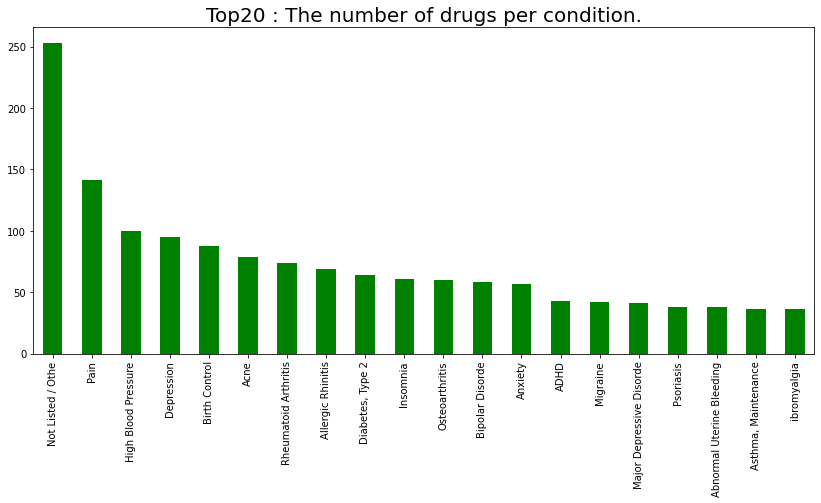

In [10]:
condition_dn = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [11]:
df_train[df_train['condition']=='3</span> users found this comment helpful.'].head(3)

,Column1,drugName,condition,review,rating,date,usefulCount
410,411,Sprintec,3</span> users found this comment helpful.,"""18 years old, taken for one year due to a sev...",9.0,2010-08-16,3.0
6034,6035,LoSeasonique,3</span> users found this comment helpful.,"""At first I had no problems with the pill. But...",2.0,2010-07-23,3.0
6042,6043,Microgestin Fe 1 / 20,3</span> users found this comment helpful.,"""At first I just experienced stomach troubles ...",7.0,2010-08-28,3.0


Text(0.5, 1.0, 'Bottom20 : The number of drugs per condition.')

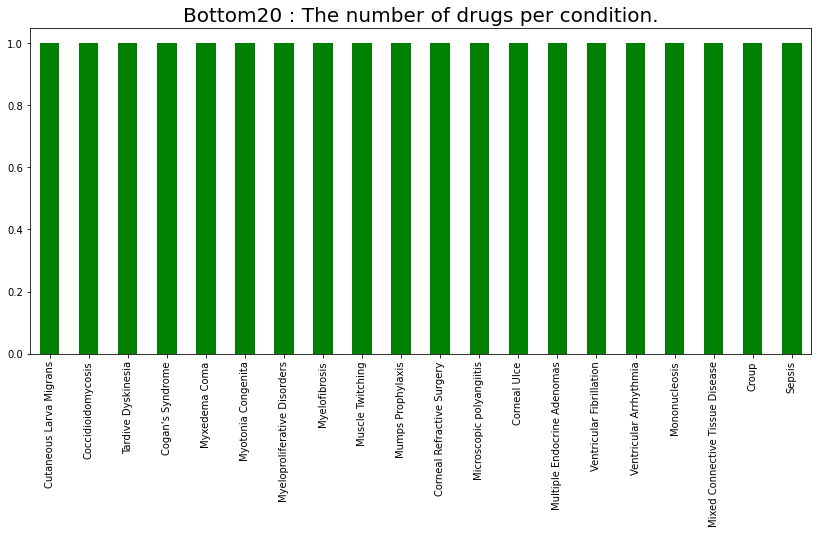

In [12]:
condition_dn = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 20)

In [13]:
df_train['review'][1]

'" Caused depression and negative, self defeating thoughts early on.  They just got worse and worse until finally it peaked in major anxiety and panic attacks so bad I could barley speak.  Then I had to step down from the drug slowly due to the well documented withdrawal problems.  So more time feeling god awful and wasted time out of my life.   In my opinion, avoid this med if you can.  It&#039;s a serious drug."'

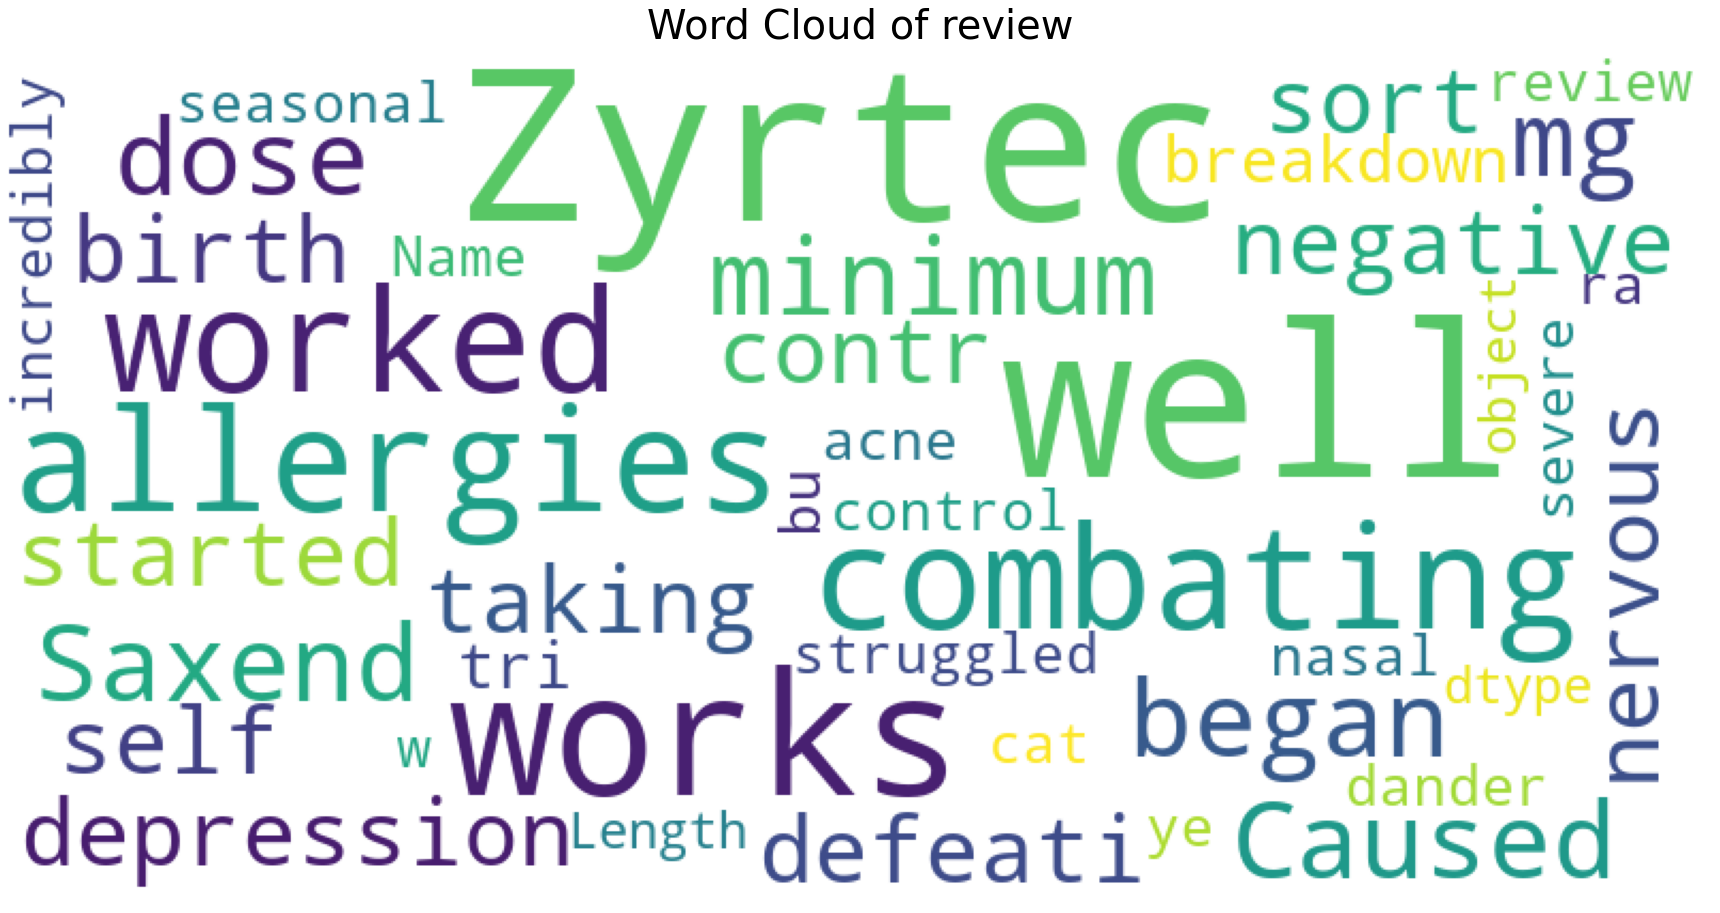

In [14]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc kernel 
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df_train["review"], title="Word Cloud of review")

In [16]:
from collections import defaultdict
df_all_6_10 = df_train[df_train["rating"]>5]
df_all_1_5 = df_train[df_train["rating"]<6]

Text(0.5, 1.0, 'Count of rating values')

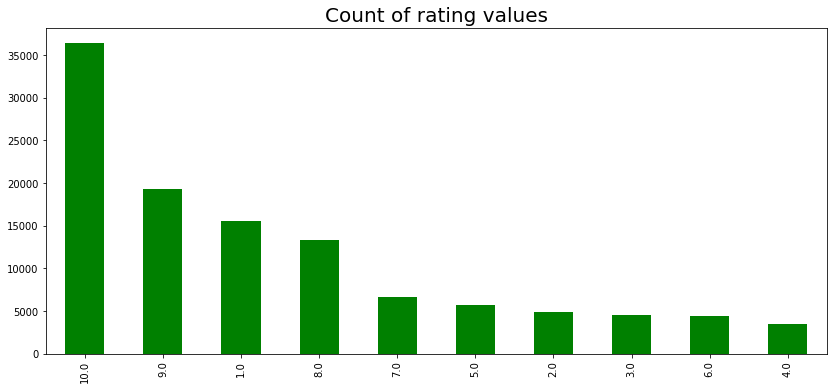

In [19]:
rating = df_train['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


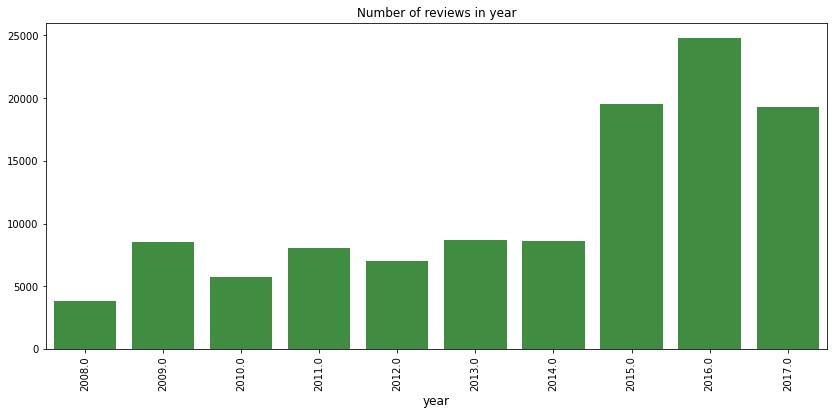

In [23]:
# Code in https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
# SRK - Simple Exploration Notebook 

cnt_srs = df_train['date'].dt.year.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('year', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Number of reviews in year")
plt.show()

Text(0.5, 1.0, 'Mean rating in year')

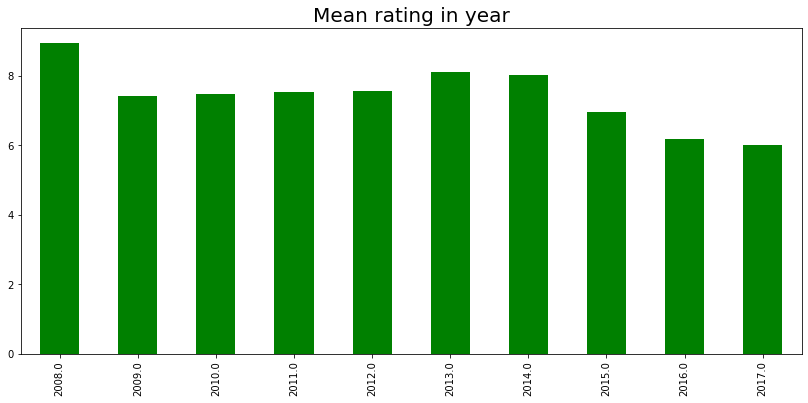

In [26]:
df_train['year'] = df_train['date'].dt.year
rating = df_train.groupby('year')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in year", fontsize = 20)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


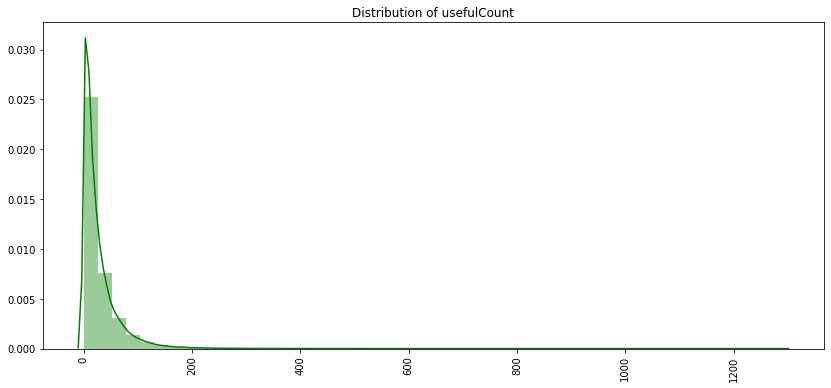

In [28]:
plt.figure(figsize=(14,6))
sns.distplot(df_train["usefulCount"].dropna(),color="green")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of usefulCount")
plt.show()

In [29]:
df_train["usefulCount"].describe()

count    114061.000000
mean         27.260194
std          35.448914
min           0.000000
25%           6.000000
50%          16.000000
75%          35.000000
max        1291.000000
Name: usefulCount, dtype: float64

Text(0.5, 1.0, 'Total Missing Value ')

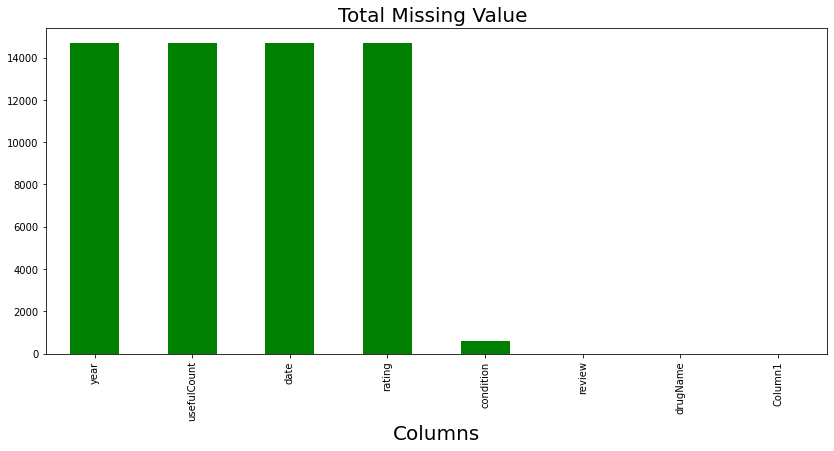

In [31]:
percent = (df_train.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [32]:
print("Missing value (%):", 1200/df_train.shape[0] *100)

Missing value (%): 0.9320460741442651


In [35]:
df_train1 = df_train.dropna(axis=0)
df_test1 = df_test.dropna(axis=0)

Text(0.5, 1.0, 'Total Missing Value ')

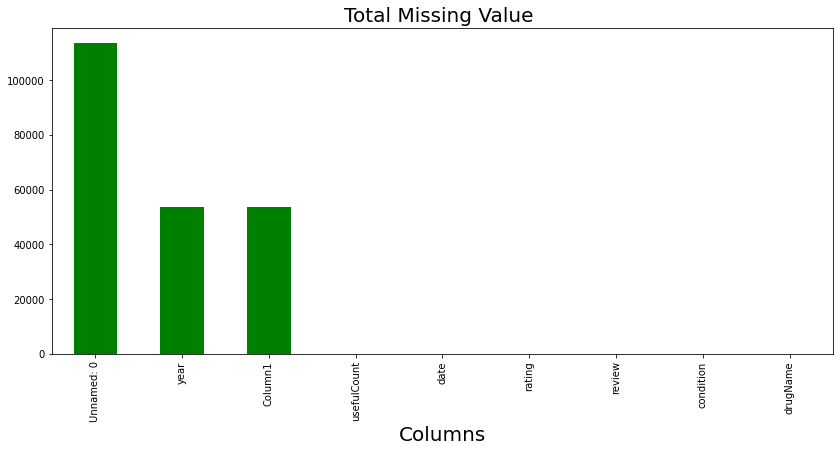

In [36]:
df_all = pd.concat([df_train1,df_test1]).reset_index()
del df_all['index']
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [37]:
all_list = set(df_all.index)
span_list = []
for i,j in enumerate(df_all['condition']):
    if '</span>' in j:
        span_list.append(i)

In [38]:
new_idx = all_list.difference(set(span_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

In [39]:
df_condition = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)

,condition,drugName
798,Secondary Cutaneous Bacterial Infections,1
799,Varicose Veins,1
800,Ventricular Fibrillation,1
801,Cogan's Syndrome,1
802,Mixed Connective Tissue Disease,1
803,Cluster-Tic Syndrome,1
804,Mononucleosis,1
805,Mumps Prophylaxis,1
806,Myotonia Congenita,1
807,Scleroderma,1


In [40]:
df_condition_1 = df_condition[df_condition['drugName']==1].reset_index()
df_condition_1['condition'][0:10]

0                                 Aspiration Pneumonia
1                                               Q Feve
2                          Autoimmune Hemolytic Anemia
3                          ge (amlodipine / valsartan)
4                             Patent Ductus Arteriosus
5    ge HCT (amlodipine / hydrochlorothiazide / val...
6                                   Rabies Prophylaxis
7              Paroxysmal Supraventricular Tachycardia
8                   Paragonimus westermani, Lung Fluke
9                                 Gestational Diabetes
Name: condition, dtype: object

In [41]:
all_list = set(df_all.index)
condition_list = []
for i,j in enumerate(df_all['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

In [42]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [48]:
# Make a rating
df_all['sentiment'] = df_all["rating"].apply(lambda x: 1 if x > 5 else 0)

In [51]:
df_train, df_test = train_test_split(df_all, test_size=0.33, random_state=42) 

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(4, 4),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(4, 4), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [53]:
#https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [59]:
!python --version

Python 3.7.6
